# MBL MERA Diagnostics

In this notebook, we make various plots of the data that we obtain from our MERAs

This system is a 1D heisenberg chain with a uniformly random magnetic field:

$H = \sum_{i}\left(\mathbf{S}_{i}\cdot \mathbf{S}_{i+1} + h_{i}S_{i}^{z}\right)$

Where $h_{i}$ is picked from the uniform distribution $[-W, W]$

# 0: Loading in Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MERA_utilities import *

Loading in our parameters, where

L_list = list of system sizes<br>
l_list = list of max unitary gate lengths<br>
num_dis = number of disorders per energy level<br>
num_energies = number of energy levels<br>

In [2]:
data_dir = '../data/'
L_list = [16, 32, 64, 128]
l_list = [3, 4, 5]
W_list = [0.0001] + list(range(1,11))
W_list_thirds = [0.33, 0.66, 1.33, 1.66, 2.33, 2.66, 3.33, 3.66, 4.33, 4.66, 5.33]
W_list += W_list_thirds
W_list.sort()
W_dict = {}
for W_idx, W in enumerate(W_list):
    W_dict[W] = W_idx
num_dis = 100
num_energies = 11

In [3]:
all_data = load_all_data(L_list, l_list, W_list, num_dis, num_energies, data_dir)

L = 16, l = 3


/home/abid/Dropbox/Research/Clarksearch/MBL_MERA/code/analysis/MERA_utilities.py:73: RuntimeWarning: invalid value encountered in sqrt
  ep_err  = np.sqrt(var)/(E_max_dmrg - E_min_dmrg)
/home/abid/Dropbox/Research/Clarksearch/MBL_MERA/code/analysis/MERA_utilities.py:76: RuntimeWarning: invalid value encountered in log10
  np.array([E, var, np.log10(var), EE, Sz, ep_mera, \
/home/abid/Dropbox/Research/Clarksearch/MBL_MERA/code/analysis/MERA_utilities.py:76: RuntimeWarning: divide by zero encountered in log10
  np.array([E, var, np.log10(var), EE, Sz, ep_mera, \


L = 16, l = 4
L = 16, l = 5
L = 32, l = 3
L = 32, l = 4
L = 32, l = 5
L = 64, l = 3
L = 64, l = 4
L = 64, l = 5
L = 128, l = 3
L = 128, l = 4
L = 128, l = 5


# 1. Distribution of Data

Given an L, l, and W, let's see what the distribution of energies look like over the disorders

<IPython.core.display.Javascript object>


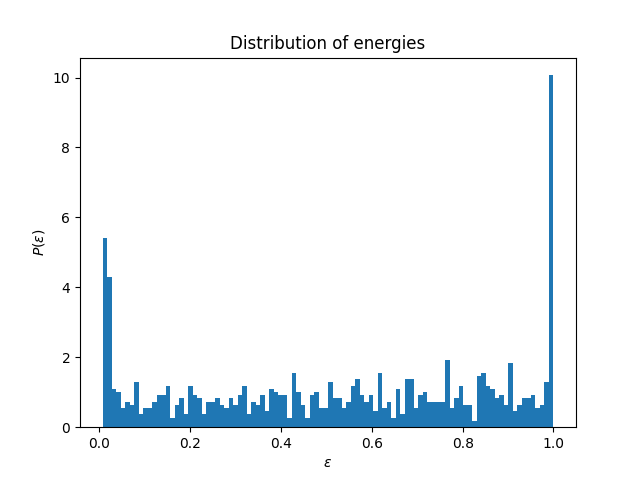

In [8]:
%matplotlib notebook
L_idx, l_idx, W_idx = 0, 0, 5
Energy_list = []
for dis in range(100):
    d = all_data[L_idx,l_idx,W_idx,dis,:,:]
    d = get_lists(flatten_data(d))
    Energy_list += list(d[EP_DMRG_IDX])
plt.hist(Energy_list, bins=100, density=True)
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$P(\epsilon)$")
plt.title("Distribution of energies")
plt.show()

Now let's look at How the data is distributed across $\epsilon$ and $W$ for a given disorder

<IPython.core.display.Javascript object>


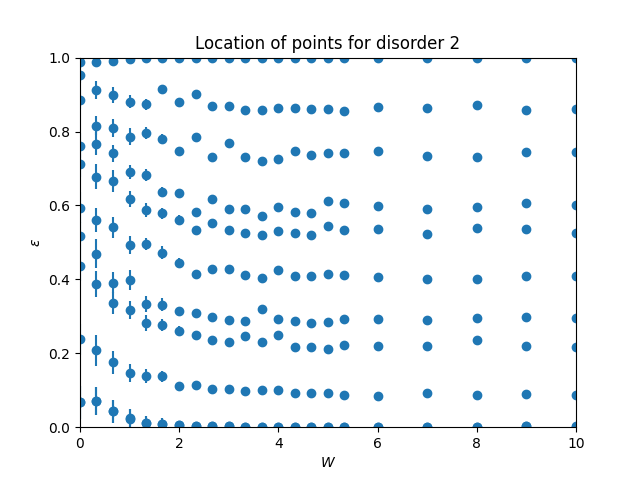

In [11]:
%matplotlib notebook
L_idx, l_idx, dis = 2, 2, 2
Energy_list = []
d = all_data[L_idx,l_idx,:,dis,:,:]
d = get_lists(flatten_data(d))
plt.errorbar(d[W_IDX], d[EP_DMRG_IDX], yerr=d[EP_ERR_IDX], fmt='o')
plt.xlabel(r"$W$")
plt.ylabel(r"$\epsilon$")
plt.title("Location of points for disorder {}".format(dis))
plt.ylim(0, 1)
plt.xlim(0, 10)
plt.show()

# 2. Parameters vs $\epsilon$ and W

Let's look at a 2D plot of Entanglement entropy, log variance, $\left<S^{z}\right>$ vs $\epsilon$ and $W$ for a given disorder

<IPython.core.display.Javascript object>


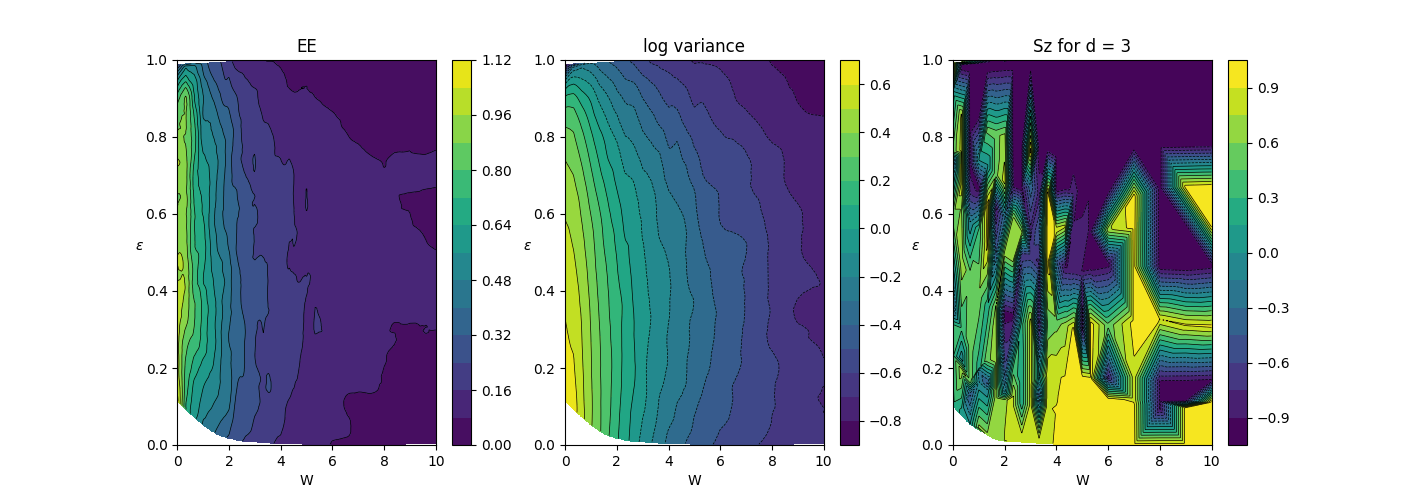

In [4]:
%matplotlib notebook
L_idx, l_idx= 2, 1
d_list = [-1, -1, 3]
IDX_list = [EE_IDX, LOGVAR_IDX, SZ_IDX]
data = [get_2d_grid(all_data, IDX, L_idx, l_idx, d) for IDX, d in zip(IDX_list, d_list)]
title_list = ["EE", "log variance", "Sz for d = {}".format(d_list[-1])]
vmin_list = [0, None, -1]
vmax_list = [None, None, 1]
for i, grid_data in enumerate(data):
    plt.subplot(int("1{}{}".format(len(data), i+1)))
    plot2d(grid_data[0], grid_data[1], grid_data[4], title=title_list[i], vmin=vmin_list[i], vmax=vmax_list[i])
plt.show()

Let's look at a horizontal slice of this plot. That is, we fix an energy level and look at the parameter as a function of W

<IPython.core.display.Javascript object>


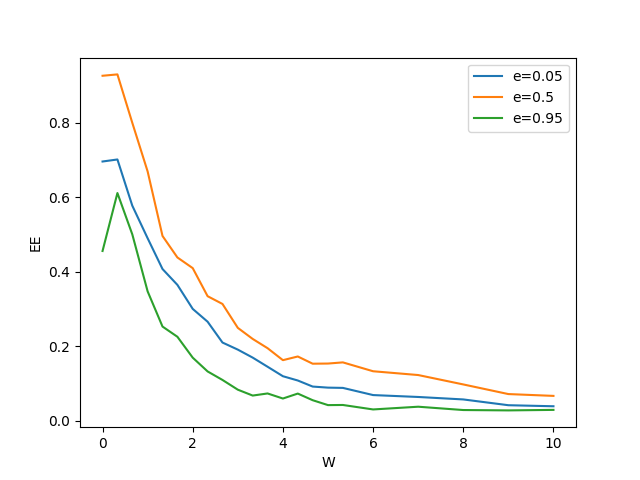

In [9]:
# plots for constant energy
L_idx, l_idx = 1, 1
%matplotlib notebook
for r in [0.05, 0.5, .95]:
    EE_mera = np.zeros(len(W_list))
    for W_idx, W in enumerate(W_list):
        W_data = all_data[L_idx,l_idx,W_idx,:,:,:]
        flattened = flatten_data(W_data)
        e_data = get_ep_data(flattened, r, tol=0.05)
        EE = np.mean(get_lists(e_data)[EE_IDX])
        EE_mera[W_idx] = EE
    plt.plot(W_list, EE_mera, label='e={}'.format(r))
plt.legend(loc='best')
plt.xlabel("W")
plt.ylabel("EE")
plt.show()

Log variance vs W for various l averaged over all energy

<IPython.core.display.Javascript object>


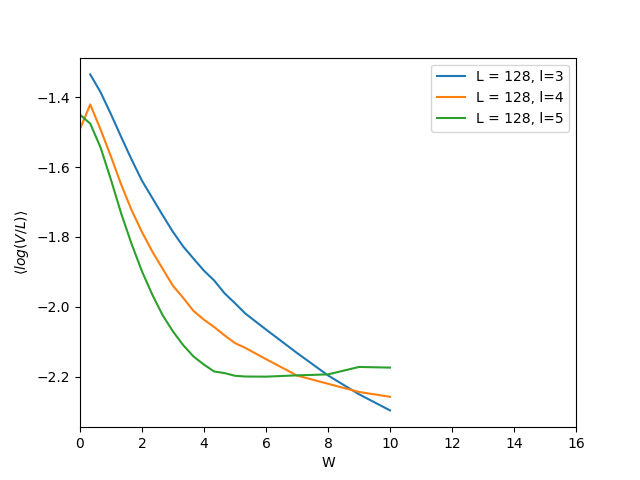

In [5]:
# plots for constant energy
%matplotlib notebook
L_idx = 3
#for L_idx, L in enumerate(L_list):
for l_idx, l in enumerate(l_list):
    var_mera = np.zeros(len(W_list))
    for W_idx, W in enumerate(W_list):
        W_data = all_data[L_idx,l_idx,W_idx,:,:,:]
        flattened = flatten_data(W_data)
        var = np.median(get_lists(flattened)[LOGVAR_IDX])
        L = L_list[L_idx]
        var_mera[W_idx] = var - np.log10(L)
    plt.plot(W_list, var_mera, label='L = {}, l={}'.format(L, l))
plt.legend(loc='best')
plt.xlabel("W")
plt.ylabel(r"$\left<log(V/L)\right>$")
#plt.ylim(-3.5, -1.5)
plt.xlim(0, 16)
plt.show()

Let's look at a vertical slice of. We fix W and look at the parameter as a function of epsilon. For a single $W$, there are 1100 points distributed across $\epsilon = 0$ to $\epsilon = 1$. This is because there are 100 disorder configurations and 11 energies per configuration. Hence, we introduce a smoothing to average out values near an energy level.

<IPython.core.display.Javascript object>


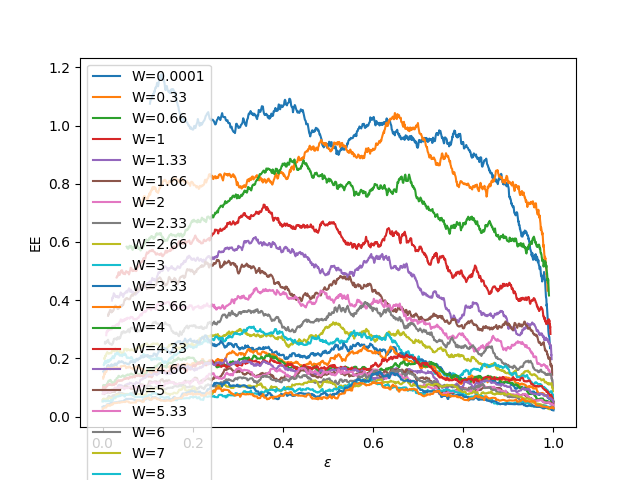

In [8]:
# plots for constant W
L_idx, l_idx = 1, 1
N = 100
%matplotlib notebook
for W in W_list:
    EE_mera = np.zeros(num_energies)
    W_idx = W_dict[W]
    W_data = all_data[L_idx,l_idx,W_idx,:,:,:]
    flattened = flatten_data(W_data)
    lists = np.array(get_sorted_data(flattened, EP_DMRG_IDX))
    x = smooth_data(lists[EP_DMRG_IDX], N)
    y = smooth_data(lists[EE_IDX], N)
    plt.plot(x, y, label='W={}'.format(W))
plt.legend(loc='best')
plt.xlabel(r"$\epsilon$")
plt.ylabel("EE")
plt.show()

Let's look at how $S_{z}$ changes with $\epsilon$ for fixed $W$. for $W<5$, we should see a change in behavior at the mobility edge. $S_{z}$ should look continuous in the MBL region, and have random behavior in the ergodic region. To quantiatively see this, we can look at $\left<\left|\frac{\partial S_{z}}{\partial \epsilon}\right|\right>$ for fixed $W$. Here, $<\cdot>$ means we average over both disorder and energy level.

<IPython.core.display.Javascript object>


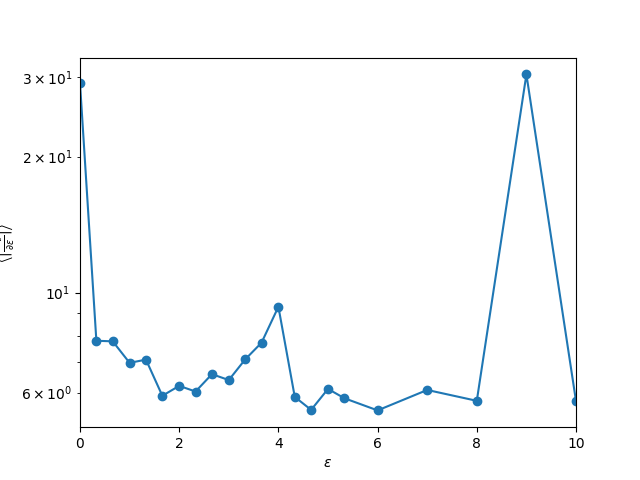

In [15]:
%matplotlib notebook
from scipy.interpolate import interp1d
L_idx, l_idx = 2, 2
N = 9
#x = np.linspace(0.25, .75, N)
sz_avg = np.zeros(len(W_list))
for W_idx, W in enumerate(W_list):
    for d in range(num_dis):
        W_idx = W_dict[W]
        W_data = all_data[L_idx,l_idx,W_idx,d,:,:]
        flattened = flatten_data(W_data)
        lists = np.array(get_sorted_data(flattened, EP_DMRG_IDX))
        eps, szs = lists[EP_DMRG_IDX], lists[SZ_IDX]
        comb = np.array([[i,j] for n, (i,j) in enumerate(zip(eps,szs)) if i not in eps[:n]])
        ep_list = np.array(comb[:,0])
        sz_list = np.array(comb[:,1])
        
        sz_1d = (sz_list[1:] - sz_list[:-1])/(ep_list[1:] - ep_list[:-1])
        ep_1d = (ep_list[1:] + ep_list[:-1])/2
       
        #sz_2d = np.abs((sz_1d[1:] - sz_1d[:-1])/(ep_1d[1:] - ep_1d[:-1]))
        #ep_2d = (ep_1d[1:] + ep_1d[:-1])/2
        
        #y_spl = interp1d(ep_1d, np.abs(sz_1d))
        
        #plt.plot(ep_1d, sz_1d, 'o-', label="first derivative")
        #plt.plot(x, y_spl(x), label="interp")
        #plt.show()
        #y_spl_2d = y_spl.derivative(n=1)
        
        sz_avg[W_idx] += np.mean(np.abs(sz_1d))
    sz_avg[W_idx] /= num_dis
plt.semilogy(W_list, sz_avg, 'o-')
        
        
plt.xlim(0,10)        
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\left<\left|\frac{\partial S_{z}}{\partial \epsilon}\right|\right>$ ")
plt.show()

# 3. Dependency on System Size L

Let's look at how the error $$\Delta \epsilon \equiv \frac{\sqrt{<E^{2}> - <E>^{2}}}{E_{max} - E_{min}}$$ changes as we increase the system size L. Let's first look at 2D plots for all L

<IPython.core.display.Javascript object>


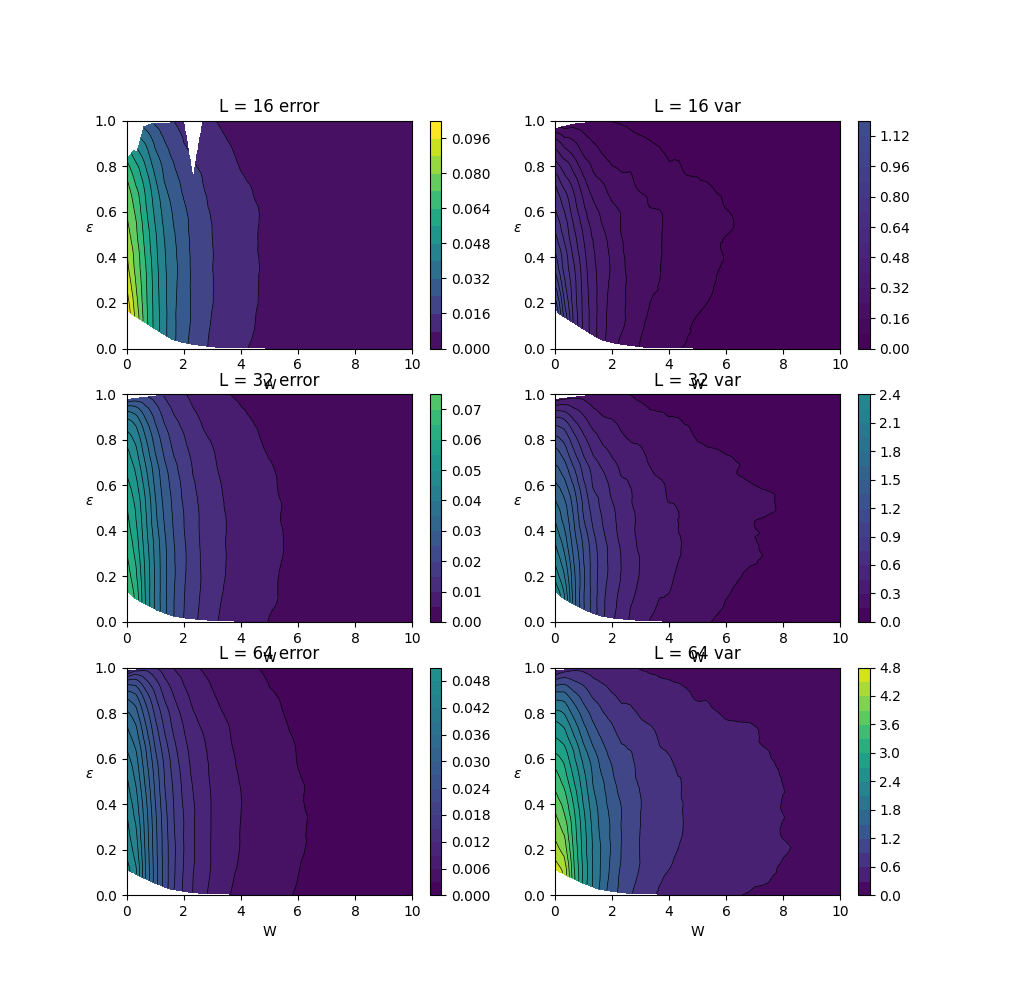

In [38]:
%matplotlib notebook
l_idx= 1
data_err = [get_2d_grid(all_data, EP_ERR_IDX, L_idx, l_idx, -1) for L_idx in range(len(L_list))]
data_var = [get_2d_grid(all_data, VAR_IDX,    L_idx, l_idx, -1) for L_idx in range(len(L_list))]

for i in range(len(L_list)):
    grid_err, grid_var = data_err[i], data_var[i]
    plt.subplot(int("{}2{}".format(len(L_list), 2*i+1)))
    plot2d(grid_err[0], grid_err[1], grid_err[4], title="L = {} error".format(L_list[i]), vmin=0, vmax=.1)
    
    plt.subplot(int("{}2{}".format(len(L_list), 2*i+2)))
    plot2d(grid_var[0], grid_var[1], grid_var[4], title="L = {} var".format(L_list[i]), vmin=0, vmax=5)
plt.show()

It's clear that while the variance increases with system size, the normalized energy error decreases. $\Delta \epsilon = 0$ tells us that we reached an eigenstate, but do larger values of $\Delta \epsilon$ tell us that we've reached eigenstates localized around $\epsilon$? If not, then we have a problem. How do we check this?

Now let's look at how the entanglement entropy for a fixed W changes with L. 

<IPython.core.display.Javascript object>


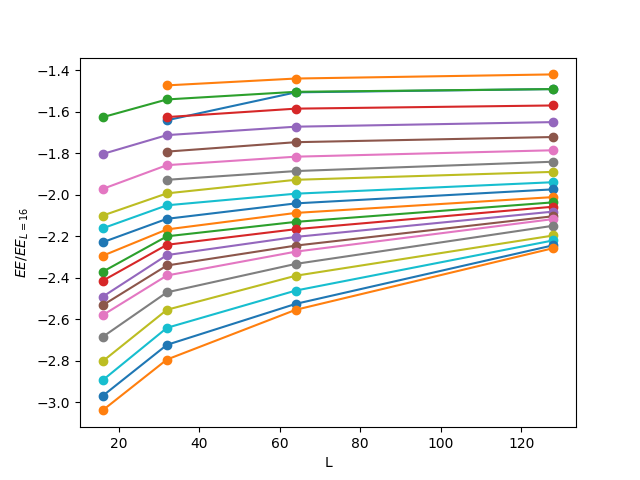

In [15]:
# plots for constant W
%matplotlib notebook
l_idx = 1
N = 100
%matplotlib notebook
for W in W_list:
    EE_mera = np.zeros(len(L_list))
    for L_idx, L in enumerate(L_list):
        W_idx = W_dict[W]
        W_data = all_data[L_idx,l_idx,W_idx,:,:,:]
        flattened = flatten_data(W_data)
        #e_data = get_ep_data(flattened, 0.5, tol=0.5)
        EE = np.mean(get_lists(flattened)[LOGVAR_IDX])
        EE_mera[L_idx] = EE - np.log10(L)
    plt.plot(L_list, EE_mera, 'o-', label='W={}'.format(W))
#plt.legend(loc='best')
plt.xlabel("L")
plt.ylabel(r"$EE/EE_{L=16}$")
plt.show()

# 4. Dependency on unitary gate size l

Let's look at the same plot, but vary $l$ instead of $L$.

<IPython.core.display.Javascript object>


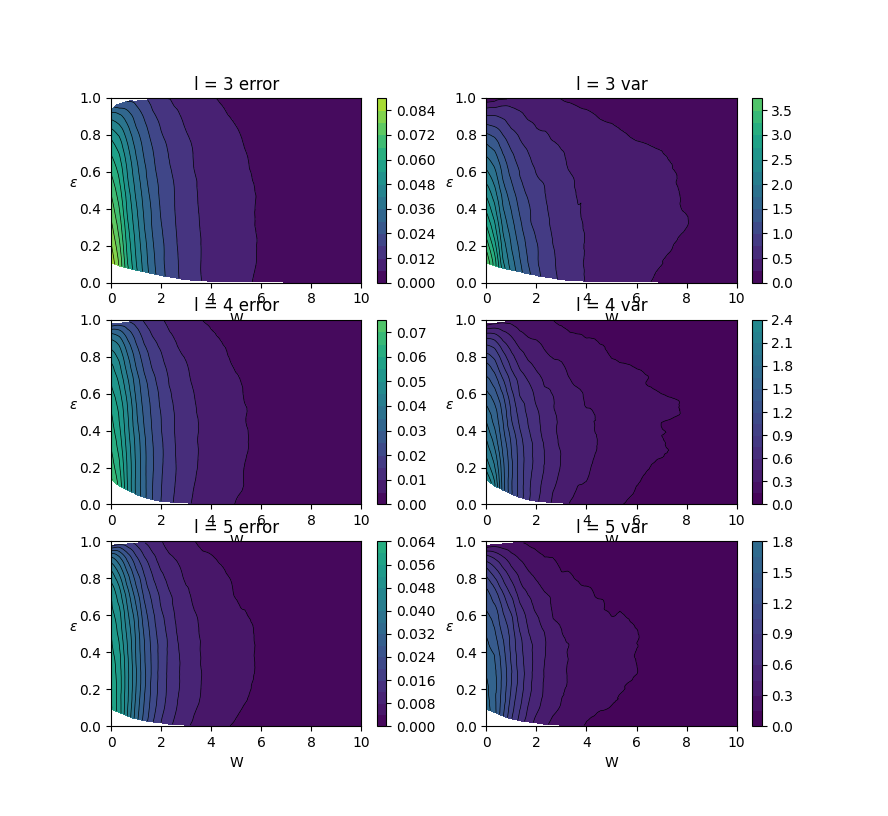

In [39]:
%matplotlib notebook
L_idx= 1
data_err = [get_2d_grid(all_data, EP_ERR_IDX, L_idx, l_idx, -1) for l_idx in range(len(l_list))]
data_var = [get_2d_grid(all_data, VAR_IDX,    L_idx, l_idx, -1) for l_idx in range(len(l_list))]

for i in range(len(l_list)):
    grid_err, grid_var = data_err[i], data_var[i]
    plt.subplot(int("{}2{}".format(len(L_list), 2*i+1)))
    plot2d(grid_err[0], grid_err[1], grid_err[4], title="l = {} error".format(l_list[i]), vmin=0, vmax=.1)
    
    plt.subplot(int("{}2{}".format(len(L_list), 2*i+2)))
    plot2d(grid_var[0], grid_var[1], grid_var[4], title="l = {} var".format(l_list[i]), vmin=0, vmax=5)
plt.show()

Let's look how the entanglement entropy changes as we increase the gate size for fixed W and energies averaged

<IPython.core.display.Javascript object>


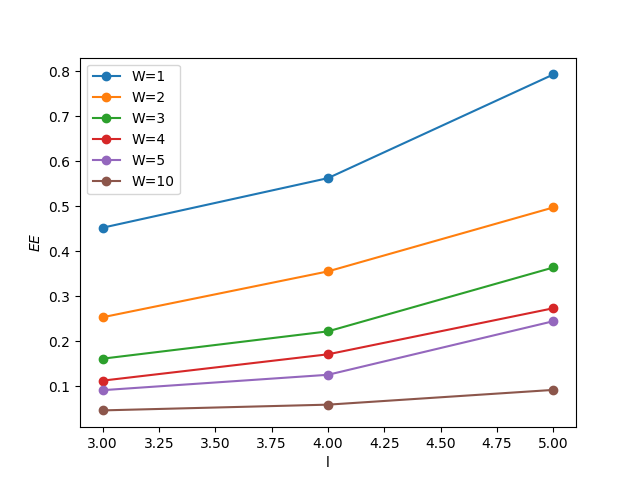

In [12]:
# plots for constant W
L_idx = 2
N = 100
%matplotlib notebook
for W in [1, 2, 3, 4, 5, 10]:
    EE_mera = np.zeros(len(l_list))
    for l_idx, l in enumerate(l_list):
        W_idx = W_dict[W]
        W_data = all_data[L_idx,l_idx,W_idx,:,:,:]
        flattened = flatten_data(W_data)
        e_data = get_ep_data(flattened, 0.5, tol=0.5)
        EE = np.mean(get_lists(e_data)[EE_IDX])
        EE_mera[l_idx] = EE
    plt.plot(l_list, EE_mera, 'o-', label='W={}'.format(W))
plt.legend(loc='best')
plt.xlabel("l")
plt.ylabel(r"$EE$")
plt.show()

Taking the slopes of these lines:

<IPython.core.display.Javascript object>


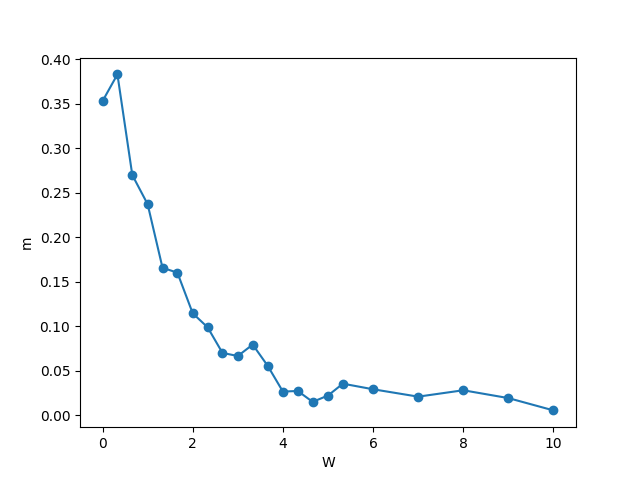

In [51]:
# plots for constant W
L_idx = 2
N = 100
%matplotlib notebook
slope_list = np.zeros(len(W_list))
for W_idx, W in enumerate(W_list):
    EE_mera = np.zeros(len(l_list))
    for l_idx, l in enumerate(l_list):
        W_data = all_data[L_idx,l_idx,W_idx,:,:,:]
        flattened = flatten_data(W_data)
        e_data = get_ep_data(flattened, 0.5, tol=0.05)
        EE_mera[l_idx] = np.mean(get_lists(e_data)[EE_IDX])
    slope_list[W_idx], _ = np.polyfit(l_list, EE_mera, 1)
plt.plot(W_list, slope_list, 'o-')
plt.xlabel("W")
plt.ylabel("m")
plt.show()

Now we Plot the distribution of the entanglement for fixed W, L, and l.

<ipython-input-92-cff9439ecd1e>:18: RuntimeWarning: divide by zero encountered in log10
  y +=list(np.log10(hist))


<IPython.core.display.Javascript object>


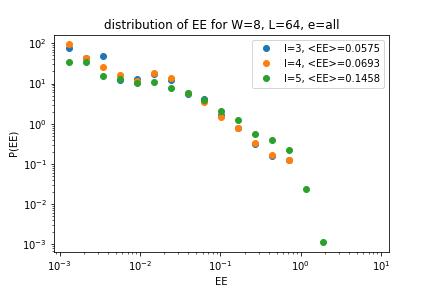

<ipython-input-92-cff9439ecd1e>:18: RuntimeWarning: divide by zero encountered in log10
  y +=list(np.log10(hist))
<ipython-input-92-cff9439ecd1e>:18: RuntimeWarning: divide by zero encountered in log10
  y +=list(np.log10(hist))


In [92]:
%matplotlib notebook
import scipy.io
for W in [8]:
    W_idx = W_dict[W]
    L_idx = 2
    ep, tol =.5, .5
    x, y = [], []
    for l_idx, l in enumerate(l_list):
        l_arr = flatten_data(all_data[L_idx,l_idx,W_idx,:,:,:])
        l_arr = get_ep_data(l_arr, ep, tol=tol)
        EEs = get_lists(np.array(l_arr))[EE_IDX]
        #EEs = np.array([np.log10(EE) for EE in EEs if str(np.log10(EE)) != 'nan'])
        bins = np.logspace(np.log10(1E-3), np.log10(10), 20)
        #bins = np.linspace(0.001, 1, 20)
        hist, bin_edges = np.histogram(EEs, bins=bins, density=True)
        bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
        x += list(np.log10(bin_centers))
        y +=list(np.log10(hist))
        #plt.subplot(121)
        plt.loglog(bin_centers, hist, 'o', label="l={}, <EE>={:.4f}".format(l, np.mean(EEs)))
        #plt.subplot(122)
        #plt.plot(np.log10(bin_centers), np.log(hist), 'o-')#, label="l={}, <EE>={:.4f}".format(l, np.mean(EEs)))
    #arr = np.array([x, y]).transpose()
    #scipy.io.savemat("W_{}.mat".format(W),  mdict={'arr': arr})

        #plt.hist(EEs, log=True, bins=20, range=[-2, 2], label="l={}, <EE>={:.4f}".format(l, np.mean(EEs)))
    e = "all" if tol == .5 else ep
    plt.title(r"distribution of EE for W={}, L={}, e={}".format(W_list[W_idx], L_list[L_idx], e))
    plt.xlabel("EE")
    plt.ylabel("P(EE)")
    #plt.xlim(.01, 10**1.5)
    plt.legend(loc='best')
    plt.show()

<ipython-input-118-fe9dc7dc3ee4>:19: RuntimeWarning: divide by zero encountered in log10
  x, y = np.log10(x), np.log10(y)


<IPython.core.display.Javascript object>


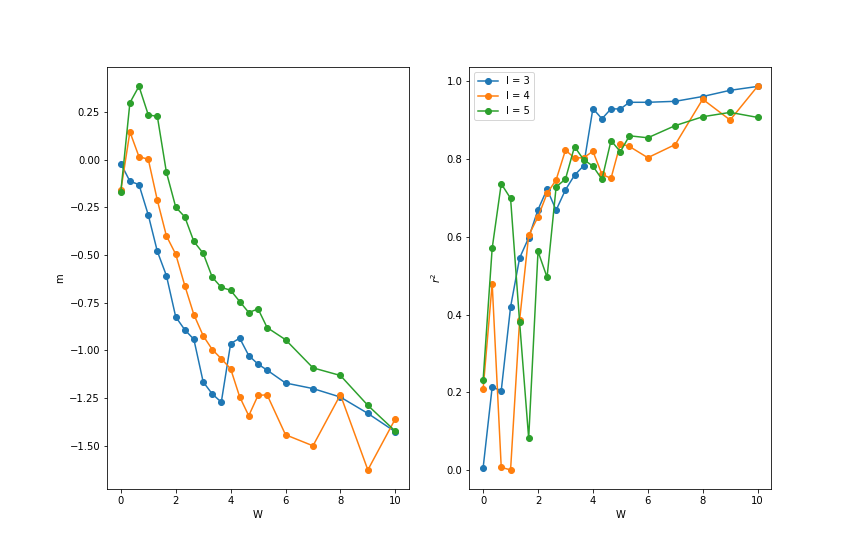

<ipython-input-118-fe9dc7dc3ee4>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)
<ipython-input-118-fe9dc7dc3ee4>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)
<ipython-input-118-fe9dc7dc3ee4>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

In [118]:
%matplotlib notebook
L_idx = 2
ep, tol =.5, .5
N=20
for l_idx, l in enumerate(l_list):
    m_list = []
    b_list = []
    r2_list = []
    for W in W_list:
        W_idx = W_dict[W]
        l_arr = flatten_data(all_data[L_idx,l_idx,W_idx,:,:,:])
        l_arr = get_ep_data(l_arr, ep, tol=tol)
        EEs = get_lists(np.array(l_arr))[EE_IDX]
        bins = np.logspace(np.log10(1E-3), np.log10(10), N)
        hist, bin_edges = np.histogram(EEs, bins=bins, density=True)
        
        bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
        x, y = np.array(bin_centers[N//4-1:3*N//4]), np.array(hist[N//4-1:3*N//4])
        x, y = np.log10(x), np.log10(y)
        x, y = np.array(list(zip(*[[a, b] for (a, b) in list(zip(x, y)) if b != -np.inf])))
        SS_y = np.sum((y - np.mean(y))**2)
        p, residuals, rank, singular_values, rcond = np.polyfit(x, y, 1, full=True)
        m_list.append(p[0])
        b_list.append(p[1])
        r2 = 1-residuals[0]/SS_y
        r2_list.append(r2)
    plt.subplot(121)
    plt.plot(W_list, m_list, 'o-', label='l = {}'.format(l))
    plt.subplot(122)
    plt.plot(W_list, r2_list, 'o-', label='l = {}'.format(l))

plt.subplot(121)
plt.xlabel("W")
plt.ylabel("m")
plt.subplot(122)
plt.legend(loc='best')
plt.xlabel("W")
plt.ylabel(r"$r^2$")
plt.show()